I first constructed annual CRFs and then calculate the orientation angles between them and ICRF3.

Here I presented the second method, which is that I use the mean positions of source within one-year windows to construct the annual CRF.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

from astropy.table import Table
import astropy.units as u

# My progs
from my_progs.catalog.read_icrf import read_icrf3
from my_progs.stat_func.rms_calc import rms_calc
from my_progs.catalog.pos_diff import radio_cat_diff_calc
from tool_func import calc_orient

In [2]:
icrf3sx = read_icrf3(wv="sx")

icrf3def = icrf3sx[icrf3sx["type"] == "D"]

In [11]:
years = np.concatenate(([1984], np.arange(1986, 2021)))

num = len(years)

In [12]:
N0 = np.zeros_like(years)
N1 = np.zeros_like(years)
pmt = np.empty((num, 8), dtype=np.float)
err = np.empty((num, 8), dtype=np.float)

In [13]:
N0_d = np.zeros_like(years)
N1_d = np.zeros_like(years)
pmt_d = np.empty((num, 8), dtype=np.float)
err_d = np.empty((num, 8), dtype=np.float)

In [14]:
for i, year in enumerate(years):
    
    print("\nProcessing time series within {:d}-{:d}".format(year, year+1))
    
    ts_sou = Table.read("../data/yearly-ts-nju-8step/{:d}.dat".format(year), format="ascii")
    
    
    # Add unit information
    ts_sou["ra"].unit = u.deg
    ts_sou["dec"].unit = u.deg
    ts_sou["ra_err"].unit = u.mas
    ts_sou["dec_err"].unit = u.mas
    
    # ICRF3 defining sources
    pos_oft = radio_cat_diff_calc(ts_sou, icrf3def, sou_name="iers_name")
    N0_d[i], N1_d[i], pmt_d[i], err_d[i] = calc_orient(pos_oft)

    # All sources
    pos_oft = radio_cat_diff_calc(ts_sou, icrf3sx, sou_name="iers_name")
    N0[i], N1[i], pmt[i], err[i] = calc_orient(pos_oft)


Processing time series within 1984-1985

Processing time series within 1986-1987

Processing time series within 1987-1988

Processing time series within 1988-1989

Processing time series within 1989-1990

Processing time series within 1990-1991

Processing time series within 1991-1992

Processing time series within 1992-1993

Processing time series within 1993-1994

Processing time series within 1994-1995

Processing time series within 1995-1996

Processing time series within 1996-1997

Processing time series within 1997-1998

Processing time series within 1998-1999

Processing time series within 1999-2000

Processing time series within 2000-2001

Processing time series within 2001-2002

Processing time series within 2002-2003

Processing time series within 2003-2004

Processing time series within 2004-2005

Processing time series within 2005-2006

Processing time series within 2006-2007

Processing time series within 2007-2008

Processing time series within 2008-2009

Processing time

# ICRF3 defining sources only

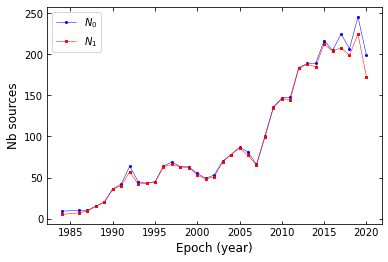

In [15]:
fig, ax = plt.subplots()

ax.plot(years, N0_d, "b-o", ms=2, lw=0.5, label="$N_0$")
ax.plot(years, N1_d, "r-s", ms=2, lw=0.5, label="$N_1$")

# ax.set_yscale("log")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Nb sources", fontsize=12)
ax.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


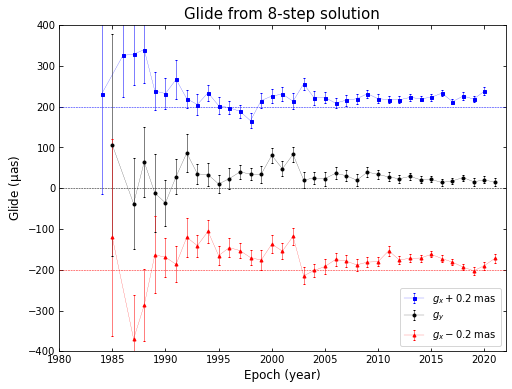

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(200, 1979, 2025, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 1979, 2025, ls="dashed", color="k", lw=0.5)
ax.hlines(-200, 1979, 2025, ls="dashed", color="r", lw=0.5)

ax.errorbar(years,
            pmt_d[:, 0] + 200,
            yerr=err_d[:, 0],
            color="blue",
            ms=3,
            fmt="-s",
            elinewidth=0.5,
            lw=0.2,
            label="$g_x+0.2$ mas",
            capsize=1)
ax.errorbar(years+1,
            pmt_d[:, 1],
            yerr=err_d[:, 1],
            color="black",
            ms=3,
            fmt="-o",
            elinewidth=0.5,
            lw=0.2,
            label="$g_y$",
            capsize=1)
ax.errorbar(years+1,
            pmt_d[:, 3] - 200,
            yerr=err_d[:, 3],
            color="red",
            ms=3,
            fmt="-^",
            elinewidth=0.5,
            lw=0.2,
            label="$g_x-0.2$ mas",
            capsize=1)

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Glide ($\mathrm{\mu as}$)", fontsize=12)

ax.axis([1980, 2022, -400, 400])
# ax.legend(bbox_to_anchor=(1.01, 1))
plt.title("Glide from 8-step solution", fontsize=15)
ax.legend()
plt.savefig("../plots/glide-from-yearly-ts-nju-8step.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


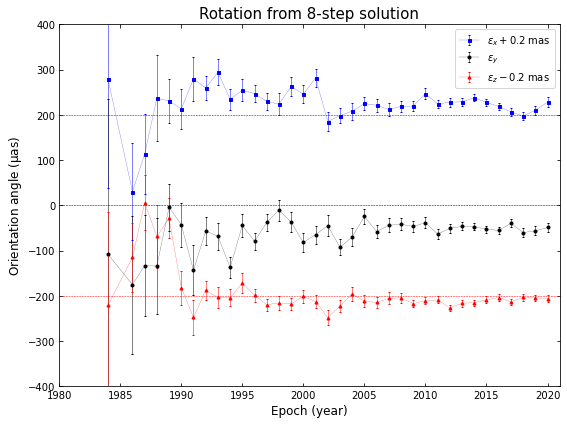

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(200, 1979, 2021, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 1979, 2021, ls="dashed", color="k", lw=0.5)
ax.hlines(-200, 1979, 2021, ls="dashed", color="r", lw=0.5)

ax.errorbar(years,
            pmt_d[:, 3] + 200,
            yerr=err_d[:, 3],
            color="blue",
            ms=3,
            fmt="-s",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_x+0.2$ mas",
            capsize=1)
ax.errorbar(years,
            pmt_d[:, 4],
            yerr=err_d[:, 4],
            color="black",
            ms=3,
            fmt="-o",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_y$",
            capsize=1)
ax.errorbar(years,
            pmt_d[:, 5] - 200,
            yerr=err_d[:, 5],
            color="red",
            ms=3,
            fmt="-^",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_z-0.2$ mas",
            capsize=1)

ax.axis([1980, 2021, -400, 400])
ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=12)
ax.legend()

plt.title("Rotation from 8-step solution", fontsize=15)
plt.tight_layout()
plt.savefig("../plots/orient-from-yearly-ts-nju-8step.eps")

In [18]:
wmean1, wrms1, wstd1 = rms_calc(pmt_d[:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[:, 5])

print("Rotation statistics (No weighted)")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))


wmean1, wrms1, wstd1 = rms_calc(pmt_d[:, 3], err_d[:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[:, 4], err_d[:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[:, 5], err_d[:, 5])

print("Rotation statistics (Weighted)")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Rotation statistics (No weighted)
    Mean   RMS  Std
    uas    uas  uas
R1   +24    52  46
R2   -65    76  38
R3    +8    55  55
Rotation statistics (Weighted)
    Mean  WRMS Std
    uas   uas  uas
R1   +24  30  18
R2   -52  54  16
R3   -10  18  14


In [19]:
mask = (years>=1985)

In [20]:
wmean1, wrms1, wstd1 = rms_calc(pmt_d[mask][:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[mask][:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[mask][:, 5])

print("Rotation statistics (No weighted, Remove data < 1985)")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

wmean1, wrms1, wstd1 = rms_calc(pmt_d[mask][:, 3], err_d[mask][:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[mask][:, 4], err_d[mask][:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[mask][:, 5], err_d[mask][:, 5])

print("Rotation statistics (Weighted, Remove data < 1985)")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Rotation statistics (No weighted, Remove data < 1985)
    Mean   RMS  Std
    uas    uas  uas
R1   +22    51  46
R2   -64    75  38
R3    +8    56  55
Rotation statistics (Weighted, Remove data < 1985)
    Mean  WRMS Std
    uas   uas  uas
R1   +24  30  18
R2   -52  54  16
R3   -10  18  14


In [21]:
mask = (years>=1990)

In [22]:
wmean1, wrms1, wstd1 = rms_calc(pmt_d[mask][:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[mask][:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[mask][:, 5])

print("Rotation statistics (No weighted, Remove data < 1990)")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

wmean1, wrms1, wstd1 = rms_calc(pmt_d[mask][:, 3], err_d[mask][:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[mask][:, 4], err_d[mask][:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[mask][:, 5], err_d[mask][:, 5])

print("Rotation statistics (Weighted, Remove data < 1990)")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Rotation statistics (No weighted, Remove data < 1990)
    Mean   RMS  Std
    uas    uas  uas
R1   +31    41  25
R2   -58    65  28
R3   -10    18  15
Rotation statistics (Weighted, Remove data < 1990)
    Mean  WRMS Std
    uas   uas  uas
R1   +24  30  17
R2   -52  54  15
R3   -11  14  9


# All sources

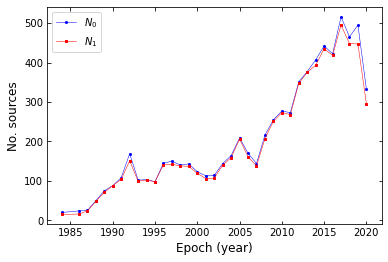

In [23]:
fig, ax = plt.subplots()

ax.plot(years, N0, "b-o", ms=2, lw=0.5, label="$N_0$")
ax.plot(years, N1, "r-s", ms=2, lw=0.5, label="$N_1$")

# ax.set_yscale("log")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("No. sources", fontsize=12)
ax.legend()

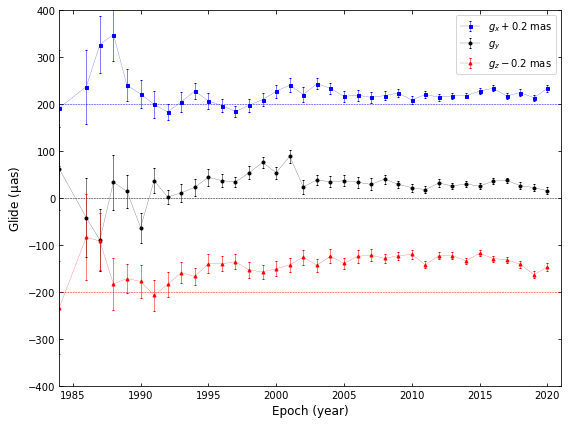

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(200, 1984, 2021, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 1984, 2021, ls="dashed", color="k", lw=0.5)
ax.hlines(-200, 1984, 2021, ls="dashed", color="r", lw=0.5)

ax.errorbar(years,
            pmt[:, 0] + 200,
            yerr=err[:, 0],
            color="blue",
            ms=3,
            fmt="-s",
            elinewidth=0.5,
            lw=0.2,
            label="$g_x+0.2$ mas",
            capsize=1)
ax.errorbar(years,
            pmt[:, 1],
            yerr=err[:, 1],
            color="black",
            ms=3,
            fmt="-o",
            elinewidth=0.5,
            lw=0.2,
            label="$g_y$",
            capsize=1)
ax.errorbar(years,
            pmt[:, 2] - 200,
            yerr=err[:, 2],
            color="red",
            ms=3,
            fmt="-^",
            elinewidth=0.5,
            lw=0.2,
            label="$g_z-0.2$ mas",
            capsize=1)

ax.axis([1984, 2021, -400, 400])
ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Glide ($\mathrm{\mu as}$)", fontsize=12)
ax.legend()

plt.tight_layout()
# plt.savefig("../plots/glide-from-yearly-ts.eps")

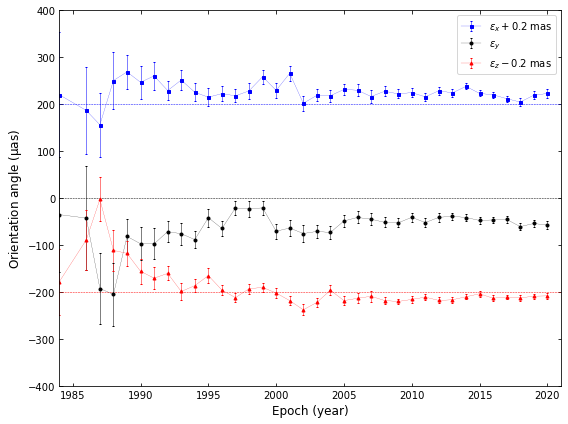

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(200, 1984, 2021, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 1984, 2021, ls="dashed", color="k", lw=0.5)
ax.hlines(-200, 1984, 2021, ls="dashed", color="r", lw=0.5)

ax.errorbar(years,
            pmt[:, 3] + 200,
            yerr=err[:, 3],
            color="blue",
            ms=3,
            fmt="-s",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_x+0.2$ mas",
            capsize=1)
ax.errorbar(years,
            pmt[:, 4],
            yerr=err[:, 4],
            color="black",
            ms=3,
            fmt="-o",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_y$",
            capsize=1)
ax.errorbar(years,
            pmt[:, 5] - 200,
            yerr=err[:, 5],
            color="red",
            ms=3,
            fmt="-^",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_z-0.2$ mas",
            capsize=1)

ax.axis([1984, 2021, -400, 400])
ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=12)
ax.legend()

plt.tight_layout()
# plt.savefig("../plots/orient-from-yearly-ts.eps")

In [26]:
wmean1, wrms1, wstd1 = rms_calc(pmt[:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt[:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt[:, 5])

print("Rotation statistics (No weighted)")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

wmean1, wrms1, wstd1 = rms_calc(pmt[:, 3], err[:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt[:, 4], err[:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt[:, 5], err[:, 5])

print("Rotation statistics (Weighted)")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Rotation statistics (No weighted)
    Mean   RMS  Std
    uas    uas  uas
R1   +26    34  21
R2   -63    74  39
R3   +11    47  46
Rotation statistics (Weighted)
    Mean  WRMS Std
    uas   uas  uas
R1   +24  27  12
R2   -49  51  14
R3    -9  17  14
